In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

supermarket_df = pd.read_csv("./data/supermarket_sales.csv")
supermarket_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## #2 What is the average unit price and quantity of products purchased? 


In [2]:
# Average unit price
average_unit_price = supermarket_df['Unit price'].mean() 
average_unit_price
f'The average unit price is {average_unit_price}.'

'The average unit price is 55.67212999999998.'

In [3]:
# Average quantity of items purchased
average_quantity_price = supermarket_df['Quantity'].mean() 
average_quantity_price
f'The average quantity purchased is {average_quantity_price}.'

'The average quantity purchased is 5.51.'

In [4]:
# A list of the different product lines
product_lines = supermarket_df['Product line'].unique().tolist()
product_lines

['Health and beauty',
 'Electronic accessories',
 'Home and lifestyle',
 'Sports and travel',
 'Food and beverages',
 'Fashion accessories']

In [5]:
# Actual number of items purchased per product line
quantity_count = supermarket_df.groupby('Product line')['Quantity'].count()
quantity_count

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Quantity, dtype: int64

In [6]:
# Average product price by product line
average_product_price = supermarket_df.groupby('Product line')['Unit price'].mean()
average_product_price


Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

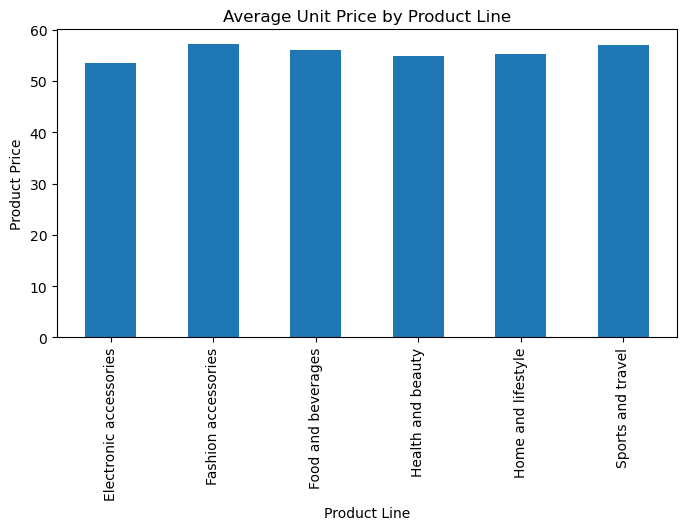

In [7]:
labels = average_product_price.index
values = average_product_price

plt.figure(figsize=[8, 4])
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.5)
plt.xlabel('Product Line')
plt.ylabel('Product Price')
plt.title('Average Unit Price by Product Line')

plt.show()

In [8]:
# Average product quantity purchased by product line
average_product_quantity = supermarket_df.groupby('Product line')['Quantity'].mean()
average_product_quantity

Product line
Electronic accessories    5.711765
Fashion accessories       5.067416
Food and beverages        5.471264
Health and beauty         5.618421
Home and lifestyle        5.693750
Sports and travel         5.542169
Name: Quantity, dtype: float64

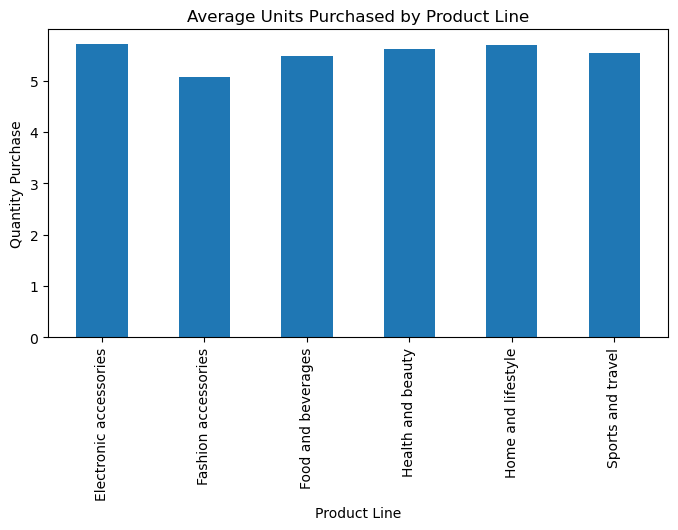

In [9]:
labels = average_product_quantity.index
values = average_product_quantity

plt.figure(figsize=[8,4])
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.5)
plt.xlabel('Product Line')
plt.ylabel('Quantity Purchase')
plt.title('Average Units Purchased by Product Line')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

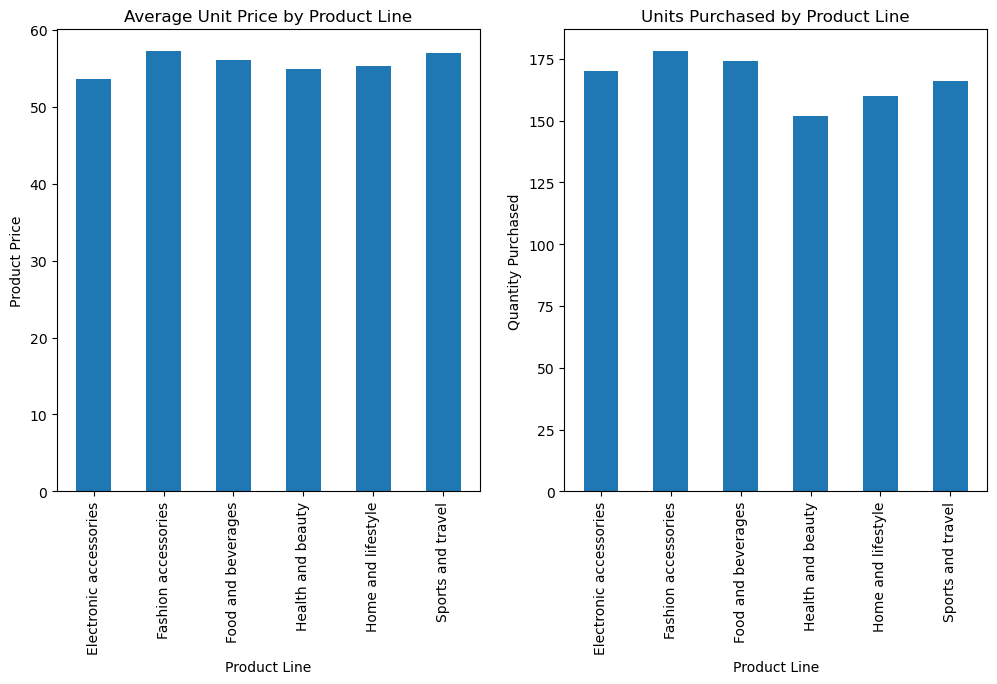

In [10]:
# Labels 1
labels = average_product_price.index
values = average_product_price

# Labels 2
labels2 = quantity_count.index
values2 = quantity_count

plt.figure(figsize=[12, 6])

#First bar chart: Average product price
plt.subplot(1, 2, 1) # Create a subplot for the first chart CHAT GPT GAVE ME THIS
plt.bar(labels, values, width=0.5)
plt.xlabel('Product Line')
plt.ylabel('Product Price')
plt.title('Average Unit Price by Product Line')
plt.xticks(rotation=90)

#Second bar chart: Quantity of products purchased
plt.subplot(1, 2, 2) # Create a subplot for the second chart CHAT GPT GAVE ME THIS
plt.bar(labels2, values2,width=0.5)
plt.xlabel('Product Line')
plt.ylabel('Quantity Purchased')
plt.title('Units Purchased by Product Line')
plt.xticks(rotation=90)

plt.show


## Is there a relationship between the unit price and the quantity purchased?

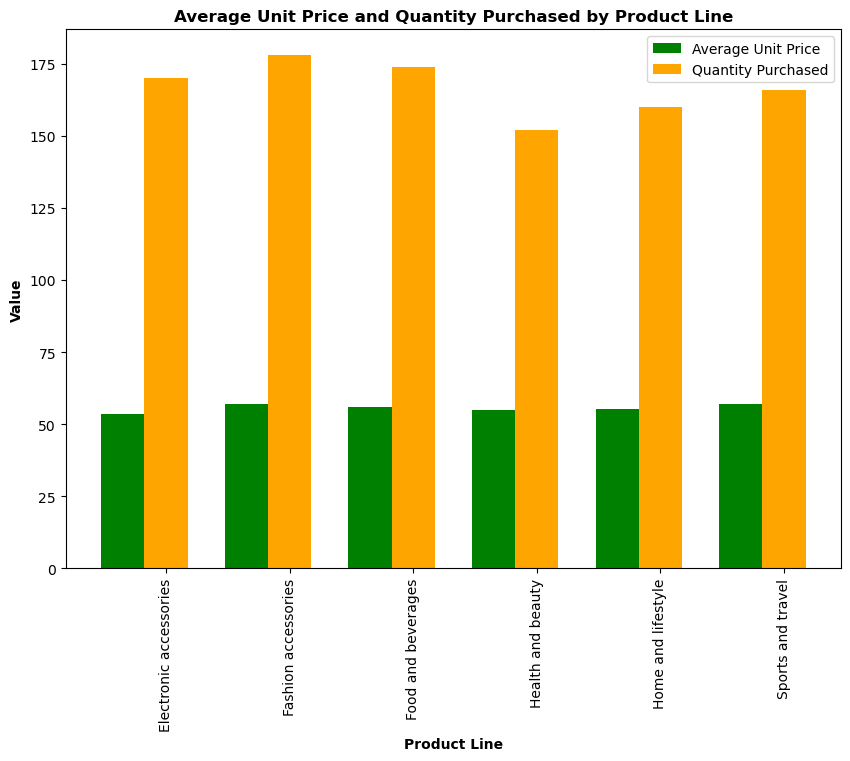

In [11]:
product_lines = ['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']
average_product_price
quantity_count 

bar_width = 0.35

# CHAT GPT TAUGHT ME THIS: Set the positions of the bars on the x-axis
r1 = np.arange(len(product_lines))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10,7))

# CHAT GPT TOLD ME ABOUT THE r1 and r2
plt.bar(r1, average_product_price, color='green', width=bar_width, label='Average Unit Price')
plt.bar(r2, quantity_count, color='orange', width=bar_width, label='Quantity Purchased')

plt.xlabel('Product Line', fontweight='bold')

#CHAT GPT TOLD ME THIS
plt.xticks([r + bar_width for r in range(len(product_lines))], product_lines, rotation=90)

plt.ylabel('Value', fontweight='bold')

plt.title('Average Unit Price and Quantity Purchased by Product Line', fontweight='bold')

plt.legend()

plt.show()


## #5 What is the correlation between customer rating and total purchase amount?

In [12]:
# Average spend by customer
avg_spent_by_customer = supermarket_df.groupby('Customer type')['Total'].mean()

# Average rating by customer
avg_rating_by_customer = supermarket_df.groupby('Customer type')['Rating'].mean()
avg_rating_by_customer

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64

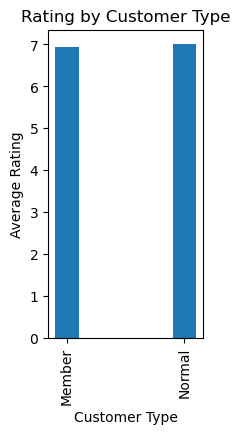

In [13]:
labels = supermarket_df['Customer type'].value_counts().index
values = avg_rating_by_customer

plt.figure(figsize=[2,4])
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.2)
plt.xlabel('Customer Type')
plt.ylabel('Average Rating')
plt.title('Rating by Customer Type')
plt.show()

In [14]:
avg_spent_by_customer

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64

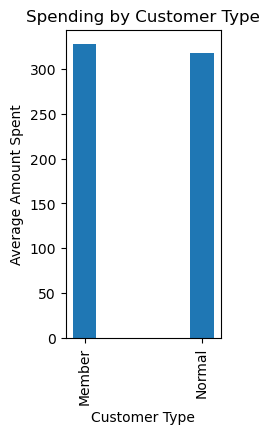

In [15]:
labels = supermarket_df['Customer type'].value_counts().index
values = avg_spent_by_customer

plt.figure(figsize=[2,4])
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.2)
plt.xlabel('Customer Type')
plt.ylabel('Average Amount Spent')
plt.title('Spending by Customer Type')
plt.show()

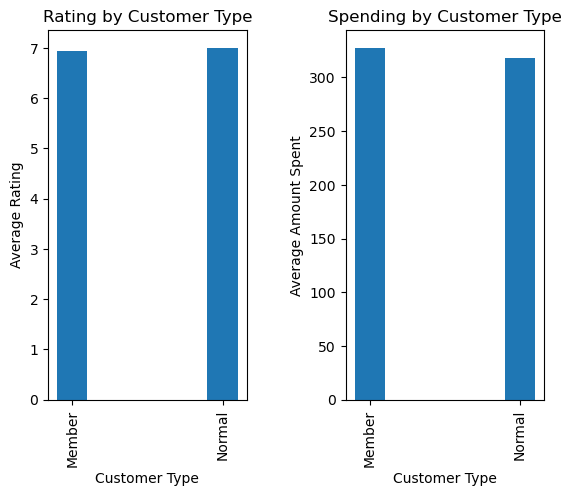

In [16]:
import matplotlib.pyplot as plt

# First chart: Rating by Customer Type
labels = supermarket_df['Customer type'].value_counts().index
values = avg_rating_by_customer

plt.subplot(1, 2, 1) # 1 row, 2 columns, plot 1
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.2)
plt.xlabel('Customer Type')
plt.ylabel('Average Rating')
plt.title('Rating by Customer Type')

# Second chart: Spending by Customer Type
labels = supermarket_df['Customer type'].value_counts().index
values = avg_spent_by_customer

plt.subplot(1, 2, 2) # 1 row, 2 columns, plot 2
plt.xticks(rotation=90)
plt.bar(labels, values, width=0.2)
plt.xlabel('Customer Type')
plt.ylabel('Average Amount Spent')
plt.title('Spending by Customer Type')

# The space between the plots- needed help with this
plt.subplots_adjust(wspace=0.5)

plt.show()

## #5 Is there a relationship between purchase time of day and customer rating?

In [17]:
supermarket_df['Time'] = pd.to_datetime(supermarket_df['Time']).dt.hour

time_bins = [10, 12, 14, 16, 18, 21]
labels = ['Morning 10-12', 'Midday 12-2', 'Afternoon 2-4', 'Early Evening 4-6', 'Evening 6-8']

# Needed help with this
supermarket_df['Time'] = supermarket_df['Time'].astype(int)

# Used notes from class for this
supermarket_df['Time of Day'] = pd.cut(supermarket_df['Time'], bins=time_bins, labels=labels, right=False)

time_avg_rating = supermarket_df.groupby('Time of Day')['Rating'].mean()

time_avg_rating

Time of Day
Morning 10-12        6.960733
Midday 12-2          7.155208
Afternoon 2-4        6.902703
Early Evening 4-6    6.898675
Evening 6-8          6.941993
Name: Rating, dtype: float64

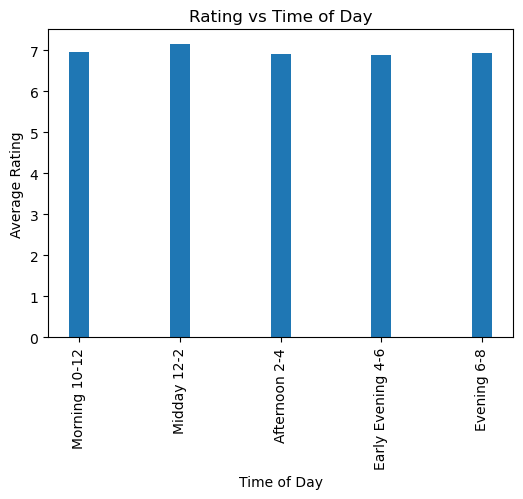

In [18]:
time_bins = [10, 12, 14, 16, 18, 21]
labels = ['Morning 10-12', 'Midday 12-2', 'Afternoon 2-4', 'Early Evening 4-6', 'Evening 6-8']

plt.figure(figsize=[6,4])
plt.xticks(rotation=90)
plt.bar(labels, time_avg_rating, width=0.2)
plt.xlabel('Time of Day')
plt.ylabel('Average Rating')
plt.title('Rating vs Time of Day')
plt.show()
